## Data Preprocessing


In [4]:
import pandas as pd

# Import the dataset using pandas and ensure that the file is in the same directory 
try:
    df = pd.read_csv("WeatherData.csv")
except FileNotFoundError:
    print("File not found in the same directory")
    df = None

if df is not None:
    # Drop last column which only has NULLs
    df = pd.DataFrame(df.iloc[:,0:-1])  #removing column with all NULL values

    # Print number of unique stations in the dataset
    print(f"\nNumber of weather stations: {len(df["Station_ID"].unique())}")

    # Print number of records for diffenent stations
    print(f"Number of recorded entries (rows): {df.shape[0]}")

    # Print number of recorded parameteres
    print(f"Number of recorded parameters (columns): {df.shape[1]}")

    # Calculate mean speed 
    mean_speed = df["Wind_Speed_kmh"].mean()

    # Create new parameter with mean speed subtracted from the original speed
    df["Mean_Wind_Speed"] = df["Wind_Speed_kmh"]-mean_speed
    
    #print(f"{df["Wind_Speed_kmh"].head()}, \n{df["Mean_Wind_Speed"].head()}")
    print(df[["Wind_Speed_kmh","Mean_Wind_Speed"]])
    


Number of weather stations: 20
Number of recorded entries (rows): 1000
Number of recorded parameters (columns): 6
     Wind_Speed_kmh  Mean_Wind_Speed
0             43.79         20.24154
1             17.41         -6.13846
2              2.12        -21.42846
3             12.39        -11.15846
4             27.33          3.78154
..              ...              ...
995           30.95          7.40154
996           22.47         -1.07846
997           44.60         21.05154
998           38.02         14.47154
999           24.52          0.97154

[1000 rows x 2 columns]


## Imputation techniques


In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Reload the original dataset for imputation comparison
df = pd.read_csv("WeatherData.csv")

# Drop last column which only has NULLs
df = pd.DataFrame(df.iloc[:,0:-1]) 

# Check number of NULLs in different columns
print("\nMissing values before imputation:")
print(df.isnull().sum())


Missing values before imputation:
Station_ID            0
Temperature_C        50
Humidity_%           50
Wind_Speed_kmh        0
Precipitation_mm      0
Weather_Condition     0
dtype: int64


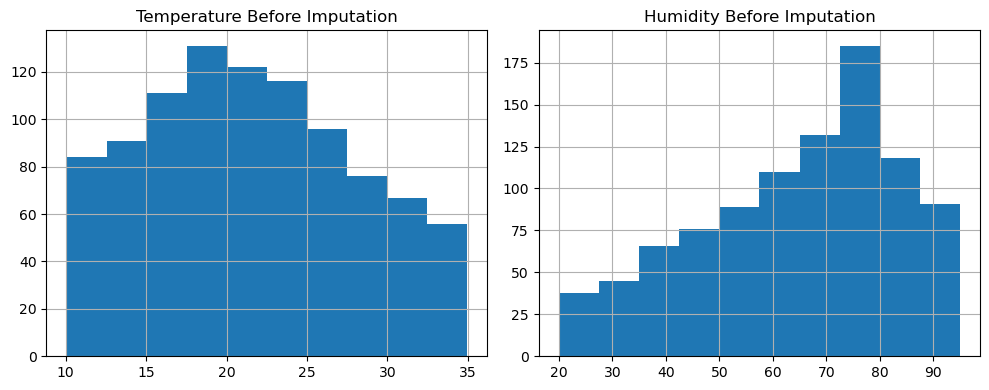

In [11]:
# Comparison of distributions before imputation
plt.figure(figsize=(10, 4))

# Create histogram for temperature before imputation 
plt.subplot(1, 2, 1)
df["Temperature_C"].hist()
plt.title("Temperature Before Imputation")

# Create histogram for humidity before imputaiton
plt.subplot(1, 2, 2)
df["Humidity_%"].hist()
plt.title("Humidity Before Imputation")

plt.tight_layout()
plt.show()



In [9]:
# Impute Temperature with mean grouped by Station_ID.
# Justification: Temperature is a continuous variable and it tends to follow a rough symmetric distribution therefore mean appraoch.
df["Temperature_C"] = df["Temperature_C"].fillna(df.groupby("Station_ID")["Temperature_C"].transform(lambda x: round(x.mean(),2)))
    
# Impute Humidity with median grouped by Station_ID.
# Justification: Humidity is numeric but a bounded percentage variable and is skewed due to environmental factors therefore median.
df["Humidity_%"] = df["Humidity_%"].fillna(df.groupby("Station_ID")["Humidity_%"].transform(lambda x: round(x.median(),2)))

# Ensure that all nulls have been filled
print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
Station_ID           0
Temperature_C        0
Humidity_%           0
Wind_Speed_kmh       0
Precipitation_mm     0
Weather_Condition    0
dtype: int64


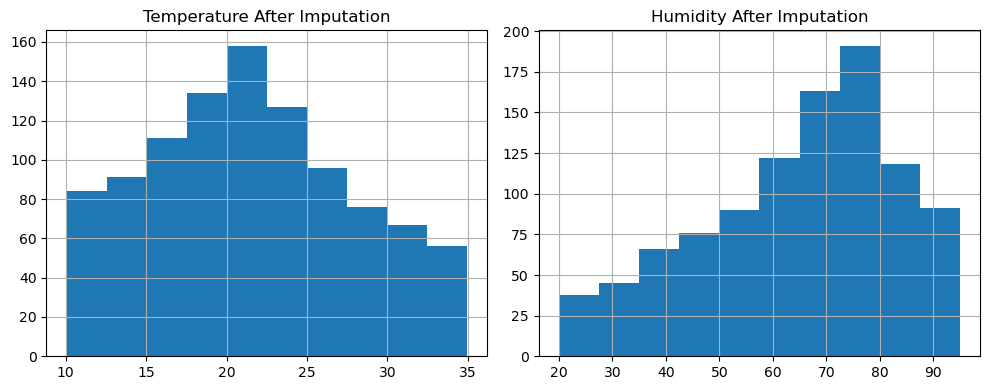

In [11]:
# Comparison of distributions after imputation
plt.figure(figsize=(10,4))

# Create temperature histogram after imputation
plt.subplot(1, 2, 1)
df["Temperature_C"].hist()
plt.title("Temperature After Imputation")

# Create humidity histogram after imputation
plt.subplot(1, 2, 2)
df["Humidity_%"].hist()
plt.title("Humidity After Imputation")

plt.tight_layout()
plt.show()

In [18]:
# Save the cleaned dataset
df.to_csv("WeatherData_Cleaned.csv", index=False)

## Encoding

In [20]:
import pandas as pd

# Create copy of cleaned dataframe
df_encode = df.copy()

# Create copy of column 'Weather Condition' to have original column in the output after encoding
df_encode['Weather_Condition_Copy'] = df_encode['Weather_Condition']

# Justification - One-hot Encoding: 'Weather_Condition' is a categorical feature with no inherent order.
#   One-hot encoding creates a binary column for each unique value, which prevents
#   the model from assuming any ordinal relationship between the conditions.
df_encode = pd.get_dummies(df_encode, columns = ['Weather_Condition_Copy'], prefix='Weather', dtype = int)
df_encode.head()


,Station_ID,Temperature_C,Humidity_%,Wind_Speed_kmh,Precipitation_mm,Weather_Condition,Weather_Cloudy,Weather_Rainy,Weather_Stormy,Weather_Sunny
0,STN_1,21.60,80.01,43.79,25.21,Stormy,0,0,1,0
1,STN_2,17.20,70.50,17.41,8.76,Cloudy,1,0,0,0
2,STN_3,26.96,53.35,2.12,1.11,Sunny,0,0,0,1
3,STN_4,22.14,86.37,12.39,10.25,Rainy,0,1,0,0
4,STN_5,12.52,86.81,27.33,23.13,Stormy,0,0,1,0


In [60]:
# Save to CSV file
df_encode.to_csv("Weather_Data_Encoded.csv", index=False)

## Min-Max Scaling

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Create copy of cleaned dataframe
df_scale_orgl = df.copy()

# Select columns with numerical values and excluding 'Station_ID' if included
num_cols = df_scale_orgl.select_dtypes(include=['number']).columns.tolist()

# Ensure Station_ID columns is excluded from numerical columns list
if 'Station_ID' in num_cols:
    num_cols.remove('Station_ID')

# Apply MaxMinScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_scale_orgl[num_cols])


# Create copy for scaled values
df_scale = df_scale_orgl.copy()
df_scale[num_cols] = scaled

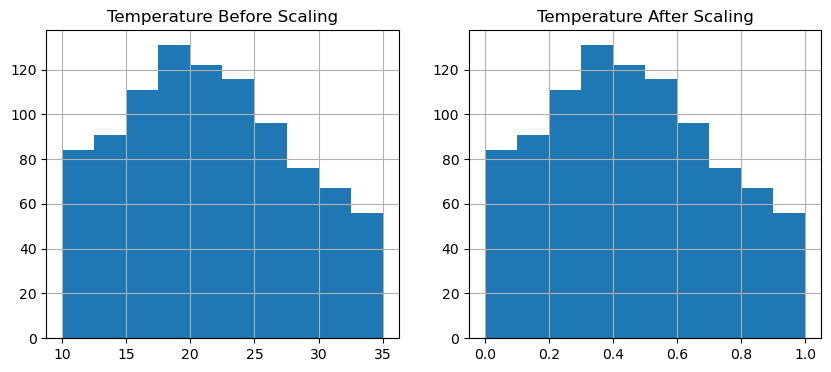

In [27]:
# Visualising Temperature Before and After Scaling
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)

# Create temperature histogram before scaling
df_scale_orgl['Temperature_C'].hist()
plt.title("Temperature Before Scaling")
plt.subplot(1,2,2)

# Create temperature histogram after scaling
df_scale['Temperature_C'].hist()
plt.title("Temperature After Scaling")
plt.show()

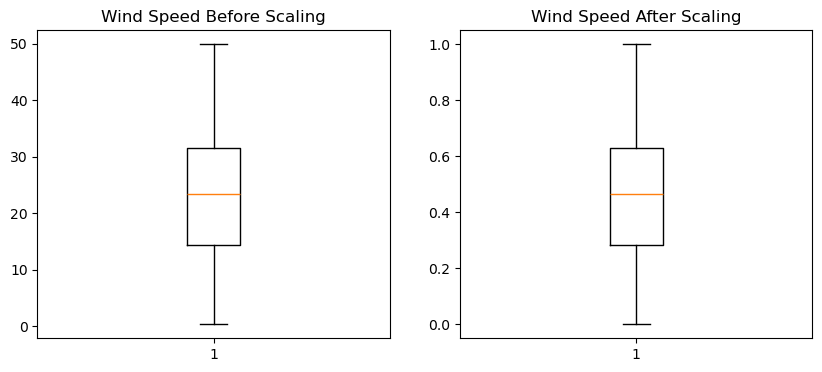

In [29]:
# Visualising Wind Speed Before and After Scaling
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)

# Create Wind Speed box plot before scaling
plt.boxplot(df_scale_orgl['Wind_Speed_kmh'])
plt.title("Wind Speed Before Scaling")
plt.subplot(1,2,2)

# Create Wind speed box plot after scaling
plt.boxplot(df_scale['Wind_Speed_kmh'])
plt.title("Wind Speed After Scaling")
plt.show()

**Scaling Before and After Analysis** There has been no effect of maxmin scaling on the distribution of the features. Distribution for Temperature and WindSpeed are same before and after scaling. However, values have been scaled to be between 0 and 1 where value closer to 0 represents lower value and values closer to 1 represent higher values. Min_max Scaling allows all features to contribute to the model equally.